In [14]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib as plt

df = pd.read_csv('/Users/zora/desktop/datasets/natural_disasters/us_disaster_declarations.csv')
df.head(10)

,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,...,incident_end_date,disaster_closeout_date,fips,place_code,designated_area,declaration_request_number,last_ia_filing_date,last_refresh,hash,id
0,DR-1-GA,1,GA,DR,1953-05-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,1953-05-02T00:00:00Z,1954-06-01T00:00:00Z,13000,0,Statewide,53013,NaN,2023-03-18T13:22:03Z,48af1afcc4535aa910ddb5b85eebe047dc703a6b,da5c8f17-c28f-4c41-8e06-fa8efc85aa4a
1,DR-2-TX,2,TX,DR,1953-05-15T00:00:00Z,1953,Tornado,Tornado & Heavy Rainfall,0,1,...,1953-05-15T00:00:00Z,1958-01-01T00:00:00Z,48000,0,Statewide,53003,NaN,2023-03-18T13:22:03Z,6bbba411d294ec521683e36313c8da2992e8a857,b0b41f55-0d77-43ac-898c-3cc4a18231e6
2,DR-3-LA,3,LA,DR,1953-05-29T00:00:00Z,1953,Flood,Flood,0,1,...,1953-05-29T00:00:00Z,1960-02-01T00:00:00Z,22000,0,Statewide,53005,NaN,2023-03-18T13:22:03Z,5b2fa18b404bdcf0d3038cd17f1aa995d5412f48,9fd9401d-c76c-43c3-b42a-6a4ae5139ec0
3,DR-4-MI,4,MI,DR,1953-06-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,1953-06-02T00:00:00Z,1956-02-01T00:00:00Z,26000,0,Statewide,53004,NaN,2023-03-18T13:22:03Z,403164346eb22263810402e8b67f1712f1574ad5,67324f38-1f00-4bbc-aeda-5194d1befad6
4,DR-5-MT,5,MT,DR,1953-06-06T00:00:00Z,1953,Flood,Floods,0,1,...,1953-06-06T00:00:00Z,1955-12-01T00:00:00Z,30000,0,Statewide,53006,NaN,2023-03-18T13:22:03Z,8c775d2ce843a8eba2417f9716ba5c75fe0e53f3,e3853916-c7a2-4557-ad8e-60a42d369a61
5,DR-6-MI,6,MI,DR,1953-06-09T00:00:00Z,1953,Tornado,Tornado,0,1,...,1953-06-09T00:00:00Z,1956-03-30T00:00:00Z,26000,0,Statewide,53007,NaN,2023-03-18T13:22:03Z,7c4aed555c671a56be96b52ef381cbf77f5a0ffb,9c154074-6937-473b-8b22-8fe3f54c9998
6,DR-8-IA,8,IA,DR,1953-06-11T00:00:00Z,1953,Flood,Flood,0,1,...,1953-06-11T00:00:00Z,1955-11-01T00:00:00Z,19000,0,Statewide,53008,NaN,2023-03-18T13:22:03Z,84c3cb7dc6a8de3f96ff4a181969c463f924fd08,0d456d0c-8aa5-4fe8-8ee0-44a2d2dd742c
7,DR-7-MA,7,MA,DR,1953-06-11T00:00:00Z,1953,Tornado,Tornado,0,1,...,1953-06-11T00:00:00Z,1956-06-01T00:00:00Z,25000,0,Statewide,53009,NaN,2023-03-18T13:22:03Z,07afc590f5515b8bce699454d205b7aa46297190,7c0a5849-631d-4170-93a3-7c4306dde9c8
8,DR-9-TX,9,TX,DR,1953-06-19T00:00:00Z,1953,Flood,Flood,0,1,...,1953-06-19T00:00:00Z,1958-01-01T00:00:00Z,48000,0,Statewide,53010,NaN,2023-03-18T13:22:03Z,2efe53c0051ff2f4af480b60b0d94ad6f1fe5611,2277957b-7a84-4abf-9e05-5fd66cbda7b3
9,DR-11-NH,11,NH,DR,1953-07-02T00:00:00Z,1953,Fire,Forest Fire,0,1,...,1953-07-02T00:00:00Z,1956-02-01T00:00:00Z,33000,0,Statewide,53011,NaN,2023-03-18T13:22:03Z,942572c0d5e6acb5766fe079af4f9989ec70ffba,c7799d1d-70a7-4b5c-ae77-7dbc65d9be40


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64092 entries, 0 to 64091
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   fema_declaration_string     64092 non-null  object
 1   disaster_number             64092 non-null  int64 
 2   state                       64092 non-null  object
 3   declaration_type            64092 non-null  object
 4   declaration_date            64092 non-null  object
 5   fy_declared                 64092 non-null  int64 
 6   incident_type               64092 non-null  object
 7   declaration_title           64092 non-null  object
 8   ih_program_declared         64092 non-null  int64 
 9   ia_program_declared         64092 non-null  int64 
 10  pa_program_declared         64092 non-null  int64 
 11  hm_program_declared         64092 non-null  int64 
 12  incident_begin_date         64092 non-null  object
 13  incident_end_date           55682 non-null  ob

In [16]:
sns.pairplot(df[['disaster_number','fy_declared','incident_type','declaration_request_number']])

In [ ]:
disaster_types = df['incident_type'].unique()
print("Types of Disasters reported:\n\n", disaster_types)
print("Occurrences:\n\n",df['incident_type'].value_counts())

Types of Disasters reported:

 ['Tornado' 'Flood' 'Fire' 'Other' 'Earthquake' 'Hurricane'
 'Volcanic Eruption' 'Severe Storm' 'Toxic Substances' 'Typhoon' 'Drought'
 'Dam/Levee Break' 'Snowstorm' 'Severe Ice Storm' 'Freezing'
 'Coastal Storm' 'Fishing Losses' 'Mud/Landslide' 'Human Cause'
 'Terrorist' 'Tsunami' 'Chemical' 'Biological' 'Tropical Storm'
 'Winter Storm']
Occurrences:

 incident_type
Severe Storm         17490
Hurricane            13045
Flood                10693
Biological            7857
Snowstorm             3707
Fire                  3615
Severe Ice Storm      2942
Tornado               1569
Drought               1292
Coastal Storm          637
Other                  307
Freezing               301
Earthquake             228
Typhoon                130
Tropical Storm          54
Volcanic Eruption       51
Winter Storm            43
Fishing Losses          42
Mud/Landslide           37
Dam/Levee Break         13
Tsunami                  9
Chemical                 9
Toxic 

/var/folders/3g/d7474w292nlfzccqcql2xs500000gn/T/ipykernel_7030/783982019.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['incident_type'].value_counts());


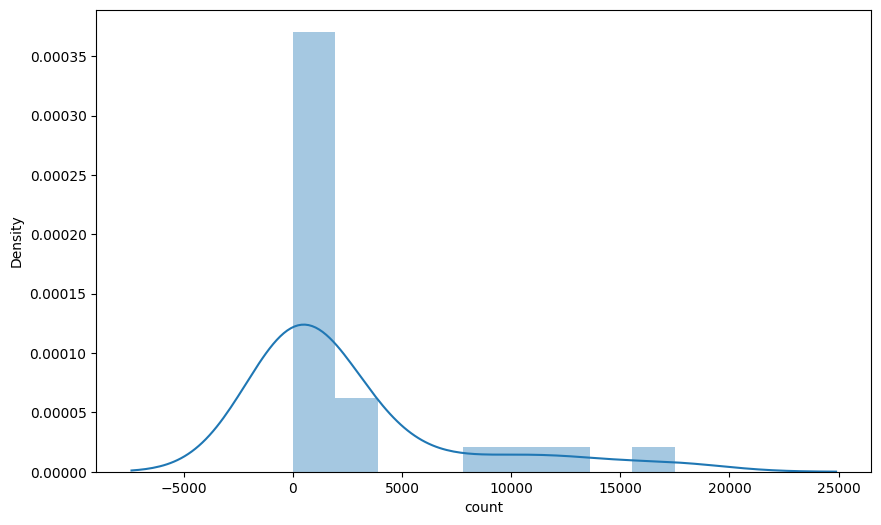

In [ ]:
plt.pyplot.figure(figsize=(10,6))
sns.distplot(df['incident_type'].value_counts());

<Axes: xlabel='top', ylabel='freq'>

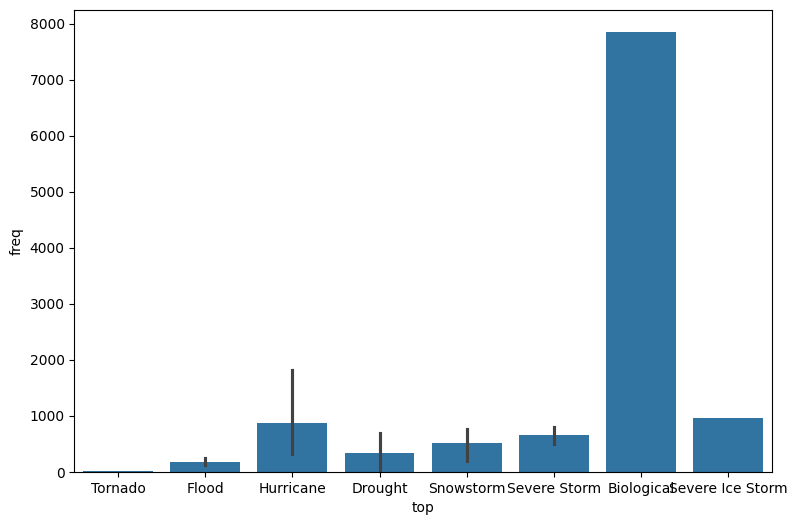

In [ ]:
m=df[['fy_declared','incident_type']].groupby('fy_declared').describe()['incident_type'].reset_index()
plt.pyplot.figure(figsize=(9,6))
sns.barplot(x='top',y='freq',data =m)

In [ ]:
m=df['fy_declared'].value_counts().reset_index()
m.head(10)

,fy_declared,count
0,2020,9490
1,2005,4692
2,2011,2684
3,2008,2430
4,2021,2158
5,2019,1910
6,2004,1863
7,2017,1835
8,1993,1773
9,1996,1750


In [ ]:
sns.lmplot(x='index',y='fy_declared',data=m.sort_values(by='fy_declared'),
           aspect=1.7, height=5,markers=['o'], scatter_kws={'s':20})

KeyError: "['index'] not in index"

In [ ]:
m=df[['state','incident_type']].groupby('state').describe()
m['incident_type'].sort_values(by='count',ascending=False).head(10)

In [ ]:
m=df[['state','incident_type']].groupby('state').describe()
sns.pairplot(m['incident_type'].reset_index(drop=True))

In [ ]:
m['incident_type'].sort_values(by='freq',ascending=False)['freq'].head(10)

In [ ]:
p = df[['state','incident_type']].groupby('state').count()
p.reset_index(inplace=True)
p=p.sort_values(by='incident_type',ascending=False).head(10)
p

In [ ]:
plt.pyplot.figure(figsize=(16,8))
sns.barplot(x="state", y="incident_type", data=p,)

In [ ]:
print("Texas mostly faces:\n")
df[['state','incident_type']].groupby('state').max().loc['TX']

In [ ]:
m=df.query('state=="TX"')['fy_declared'].value_counts().reset_index()
m.head(10)

In [ ]:
plt.pyplot.figure(figsize=(24,12))
sns.barplot(x='index',y='fy_declared',data=m.sort_values(by='fy_declared'));

In [ ]:
df.query('state == "TX" & fy_declared=="2020"')['incident_type'].unique()

In [ ]:
print("Total Areas\n",df['designated_area'].nunique())

In [ ]:
df[['designated_area','incident_type']].groupby('designated_area').count().sort_values(by='incident_type',ascending=False).head(10)

In [ ]:
d = pd.to_datetime(df['declaration_date']).dt
df['year'] = d.year
df['month'] = d.month
df['day'] = d.day
df['time'] = d.time
del df['declaration_date']

In [ ]:
df['declaration_type'].value_counts()

In [ ]:
df[['year','month','declaration_type']].groupby(['year','month']).describe()

In [ ]:
m=df[['year','declaration_type']]
plt.pyplot.figure(figsize=(8,5))
sns.boxplot(x='declaration_type',y='year',data=m)

In [ ]:
plt.pyplot.figure(figsize=(8,5))
sns.barplot(x='index',y='declaration_type',data=df['declaration_type'].value_counts().reset_index())

In [ ]:
m=df[['year','month','day','declaration_type']].groupby(['year','month','day']).count()
m.reset_index().sort_values(by='declaration_type',ascending=False)

In [ ]:
#13/03/20
df.query('year=="{0}" & month=="{1}" & day =="{2}"'.format(2020,3,13))['declaration_title'].value_counts()

In [ ]:
m = df.query('year=="{0}" & declaration_title=="Covid-19"'.format(2020))
plt.pyplot.figure(figsize=(20,10))
sns.countplot(x='state',data=m.sort_values(by='time'))

In [ ]:
#13/01/1996
df.query('year=="{0}" & month=="{1}" & day =="{2}"'.format(1996,1,13))['declaration_title'].unique()

In [ ]:
df.query('year=="{0}" & month=="{1}" & day =="{2}"'.format(2020,4,4))['declaration_title'].unique()

In [ ]:
#September 2005
m=df.query('year=="{0}" & month=="{1}"'.format(2005,9))
m['declaration_title'].value_counts()

In [ ]:
plt.pyplot.figure(figsize=(16,16))
sns.countplot(x='declaration_title',data=m.sort_values(by='time'),hue='state')

In [ ]:
m = df.query('ia_program_declared == "0" & ih_program_declared == "0" & pa_program_declared =="0"')
m['incident_type'].value_counts()

In [ ]:
pt = df.pivot_table(values ='disaster_number', index = 'state', columns = 'year').fillna(0)
plt.pyplot.figure(figsize=(12,8))
sns.heatmap(pt, cmap='coolwarm')
plt.pyplot.savefig('heatmap.png')